We will explore the housing dataset. The dataset can be found here:

[Housing Prices](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/code)

We will see if area is the primary feature in determining housing prices.

The dataset has the following columns:



*   price - Price of the Houses
*   area - Area of a House
*   bedrooms - Number of House Bedrooms
*   bathrooms - Number of Bathrooms
*   stories - Number of House Stories
*   mainroad - Whether the house is connected to Main Road
*   guestroom - Whether the house has a guest room
*   basement - Whether the house has a basement
*   hotwaterheating - Whether the house has a hot water heating    
*   airconditioning - Whether the house has a air conditioning 
*   parking - Number of parking spots the house contains            
*   prefarea -           
*   furnishingstatus - The furnishing status of the house

We will investigate the following hypothesis: **area is the most important factor that determines price**.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

# Import Data

In [2]:
df = pd.read_csv('Housing.csv')

## Inspecting the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Null_Percent':df.isna().sum() / len(df),
    'Types':df.dtypes.values
})
table

,Unique,Null,Null_Percent,Types
price,219,0,0.0,int64
area,284,0,0.0,int64
bedrooms,6,0,0.0,int64
bathrooms,4,0,0.0,int64
stories,4,0,0.0,int64
mainroad,2,0,0.0,object
guestroom,2,0,0.0,object
basement,2,0,0.0,object
hotwaterheating,2,0,0.0,object
airconditioning,2,0,0.0,object


We can see from the following output that there are no missing data from any of the columns. We will explore these columns more closely

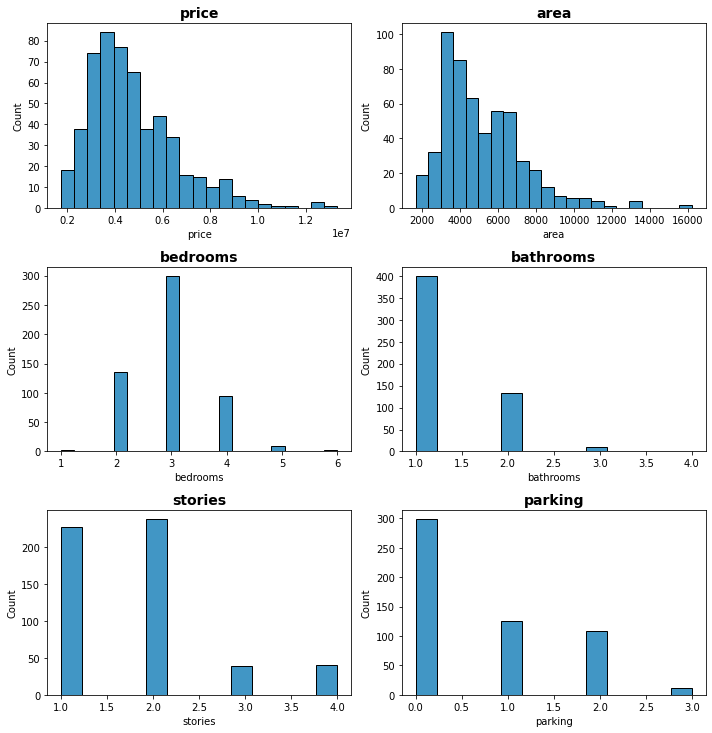

In [6]:
plt.figure(figsize=(10,20))
for i,num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6, 2, i + 1)
    sns.histplot(x=df[num])
    plt.title(num, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<AxesSubplot: >

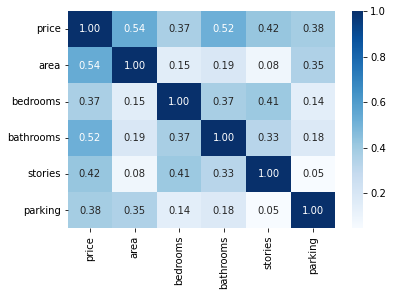

In [7]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")

We see that there is correlation with the price variable. Area and bathrooms seem to have the highest correlation with price. We will examine this more below.

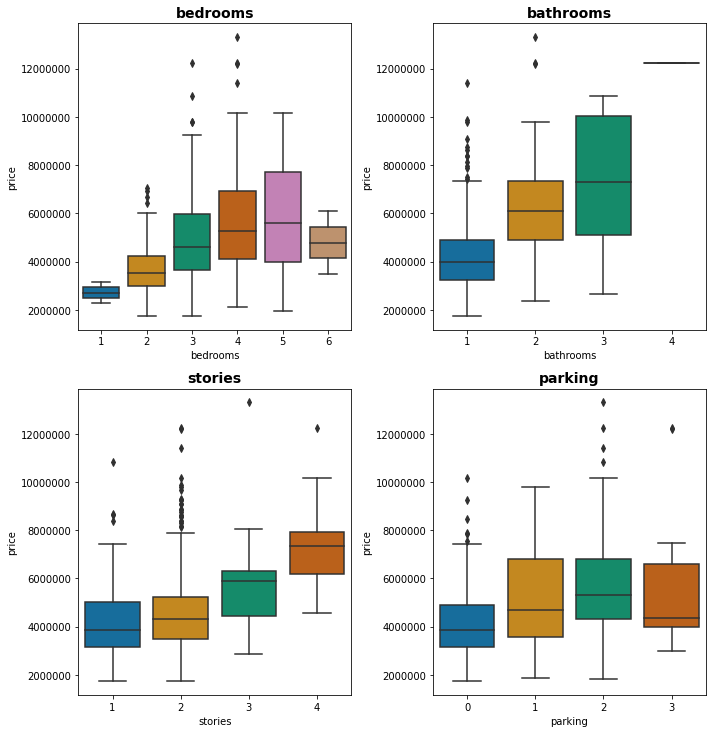

In [8]:
columns = ['bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(10,20))
for i, num in enumerate(columns):
    ax = plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[num], y=df['price'])
    plt.title(num, fontsize=14, fontweight='bold')
    plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

We see that price generally increases as the number of bedrooms, bathrooms, and stories. The stories was a bit of a surprise for me as I would think that the square footage of the house would a bigger indicator. We can explore this if we elect to go with a model. For now, we will look at the categorical variables more closely.


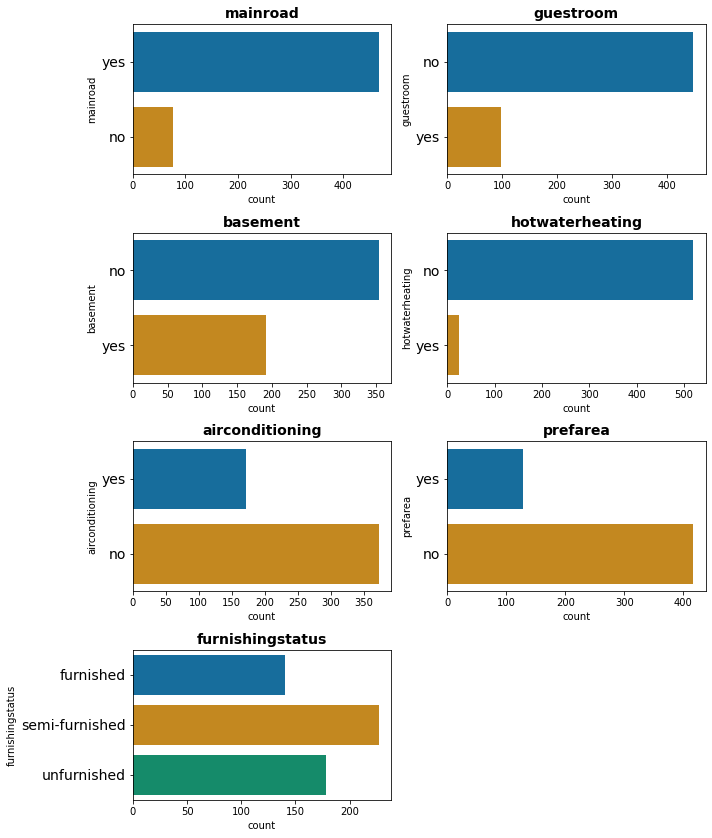

In [9]:
plt.figure(figsize=(10,20))
for i,cat in enumerate(df.select_dtypes(include='O')):
    ax = plt.subplot(7,2, i + 1)
    sns.countplot(y=df[cat])
    plt.title(cat, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Sadly, more houses contain no air conditioner. Let's look at prices against these variables

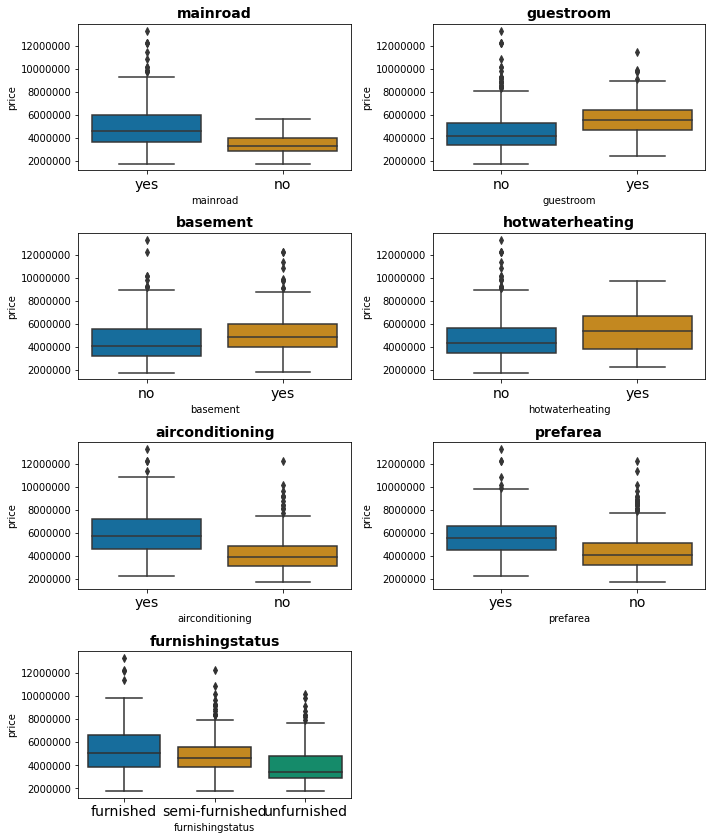

In [10]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']
plt.figure(figsize=(10,20))
for i,num in enumerate(columns):
    ax = plt.subplot(7,2, i + 1)
    sns.boxplot(x=df[num], y=df['price'])
    plt.ticklabel_format(style='plain',axis='y')
    plt.title(num, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

Next, let's plot price against area and investigate the prices a bit more.

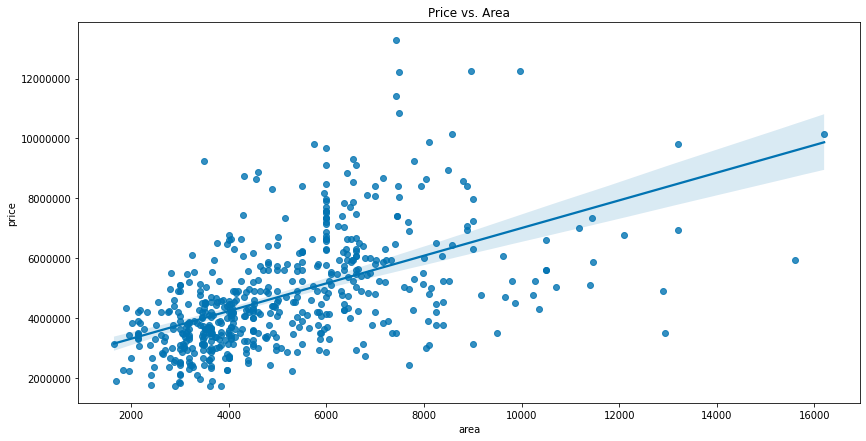

In [11]:
plt.figure(figsize=(14,7))
sns.regplot(x=df['area'], y=df['price']).set(title="Price vs. Area")
plt.ticklabel_format(style='plain',axis='y')

We see, as expected, that as area increases so does price. We will find some other statistics for price below.

In [12]:
print('Minimum Price:',df['price'].min())
print('Maximum Price:',df['price'].max())
print('Average Price:',df['price'].mean())
print('Median Price:',df['price'].median())
print('Standard Deviation of Price:',df['price'].std())

Minimum Price: 1750000
Maximum Price: 13300000
Average Price: 4766729.247706422
Median Price: 4340000.0
Standard Deviation of Price: 1870439.6156573922


In [13]:
high = df[df['price'] > 4766729]
low = df[df['price'] <= 4766729]

In [14]:
print(f"There are {round(len(high) / len(df) * 100)} high valued houses")
print(f"There are {round(len(low) / len(df) * 100)} low valued houses.")

There are 41 high valued houses
There are 59 low valued houses.


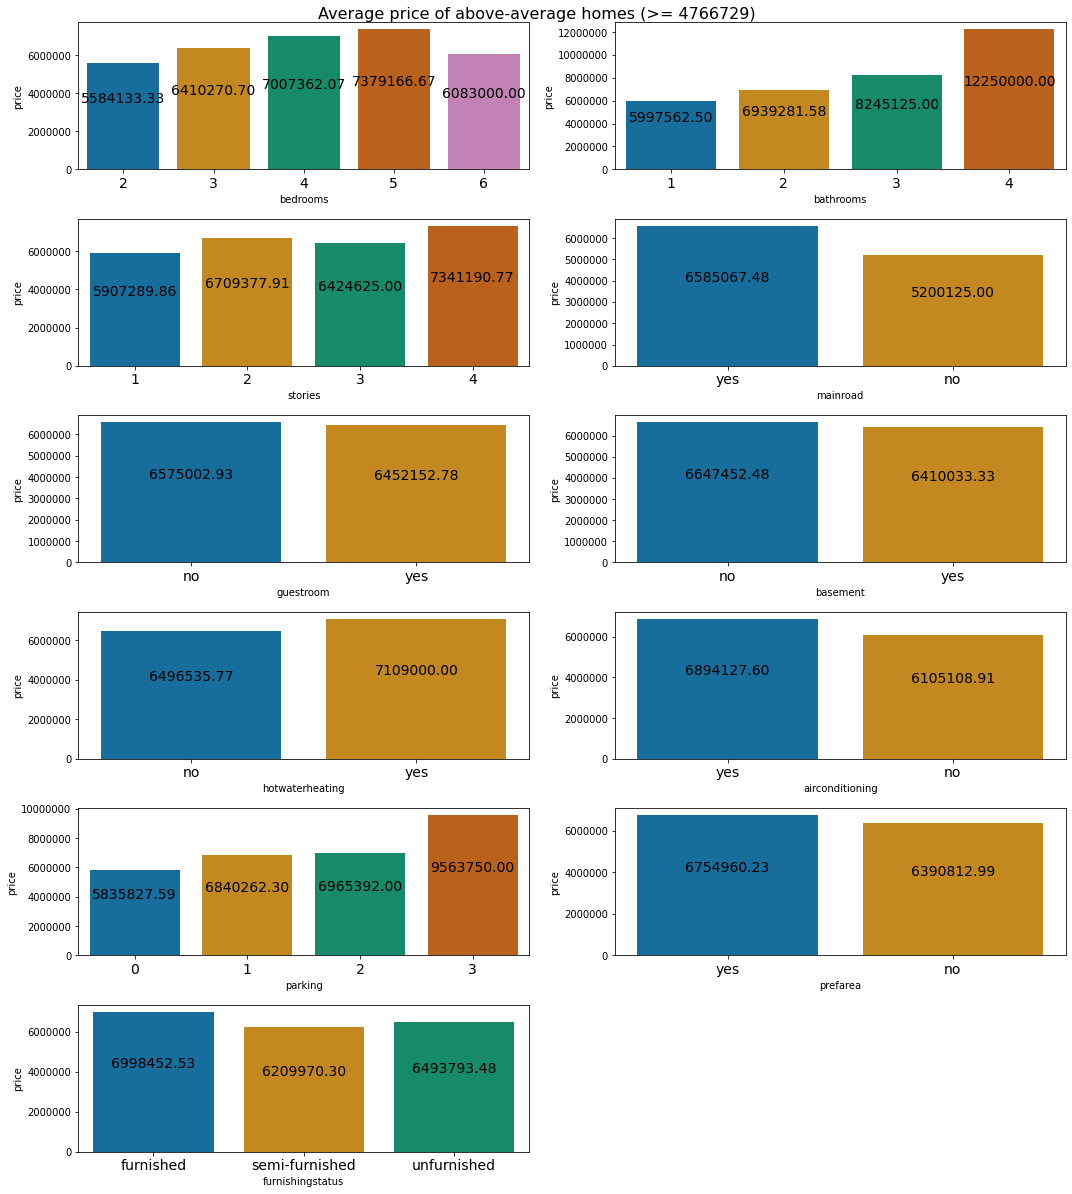

In [15]:
cat = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(15,30))
plt.suptitle('Average price of above-average homes (>= 4766729)', fontsize=16, y=0.99)
for i, d in enumerate(cat):
    ax = plt.subplot(11,2,i + 1)
    sns.barplot(x=high[d], y=high['price'], ci=None)
    plt.ticklabel_format(style='plain',axis='y')
    plt.xticks(fontsize=14)
    for n in ax.containers:
        ax.bar_label(n,fmt='%.2f',label_type='center', fontsize=14, padding=18)
plt.tight_layout()
plt.show()

Next we will look at area above and below average

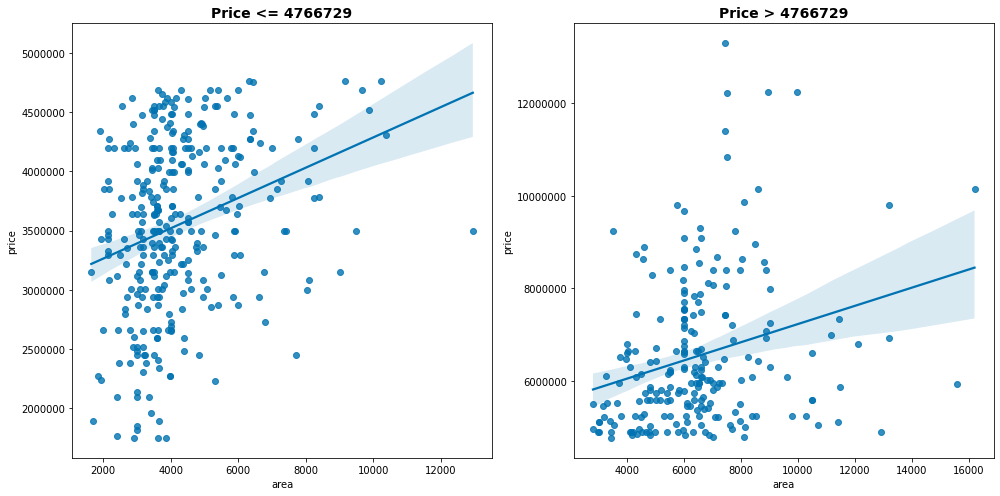

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14,7))

sns.regplot(x=low['area'], y=low['price'], ax=axes[0])
axes[0].ticklabel_format(style='plain',axis='y')
axes[0].set_title('Price <= 4766729', fontsize=14, fontweight='bold')

sns.regplot(x=high['area'], y=high['price'],ax=axes[1])
axes[1].ticklabel_format(style='plain',axis='y')
axes[1].set_title('Price > 4766729', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

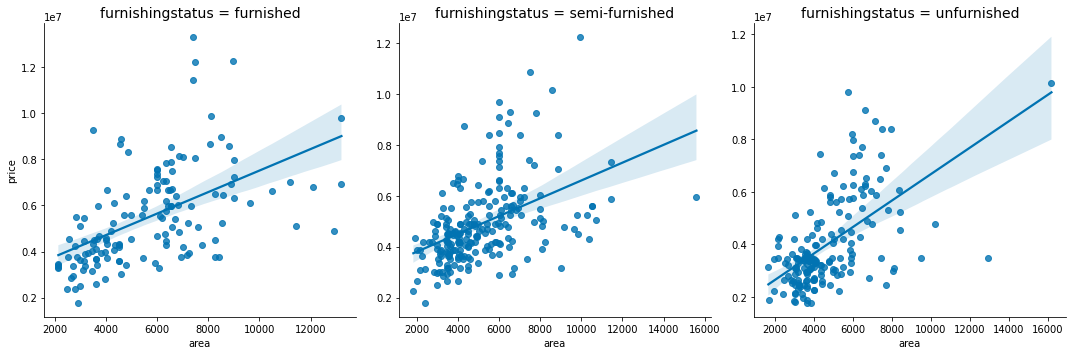

In [17]:
g = sns.lmplot(data=df,x='area', y='price', col='furnishingstatus',facet_kws=dict(sharex=False, sharey=False))
g.set_titles(size=14)
plt.show()

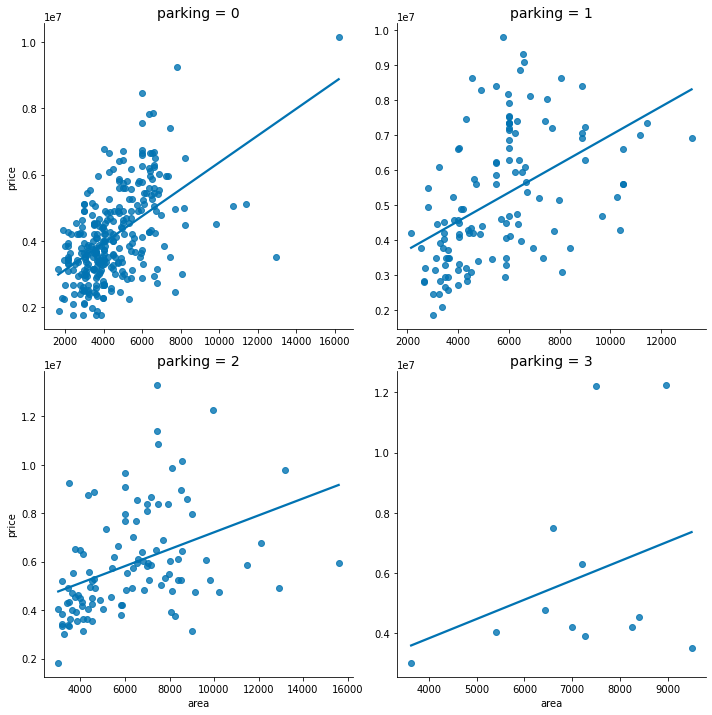

In [18]:
g = sns.lmplot(data=df,x='area', y='price', col='parking', col_wrap=2
           ,facet_kws=dict(sharex=False, sharey=False), ci=None)
g.set_titles(size=14)
plt.show()

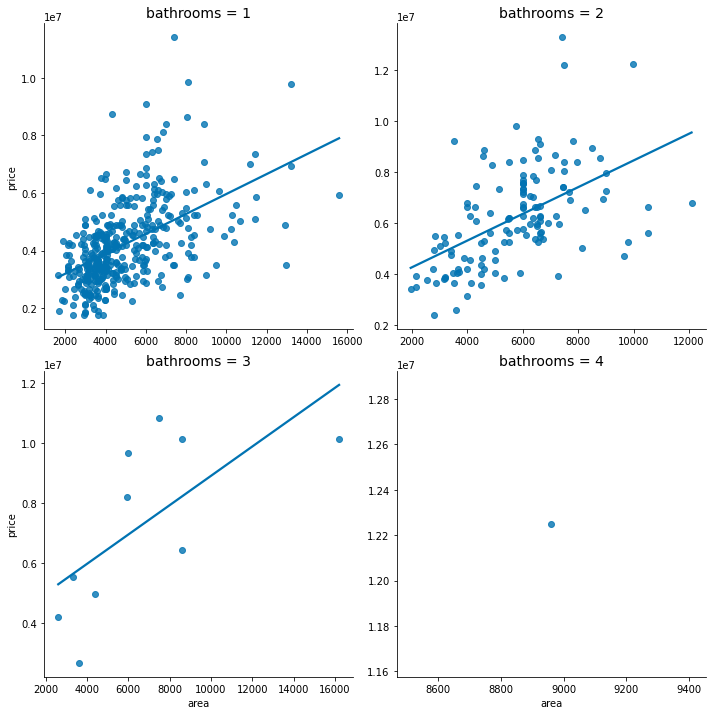

In [19]:
g = sns.lmplot(data=df,x='area', y='price', col='bathrooms',col_wrap=2
           ,facet_kws=dict(sharex=False, sharey=False), ci=None)
g.set_titles(size=14)
plt.show()

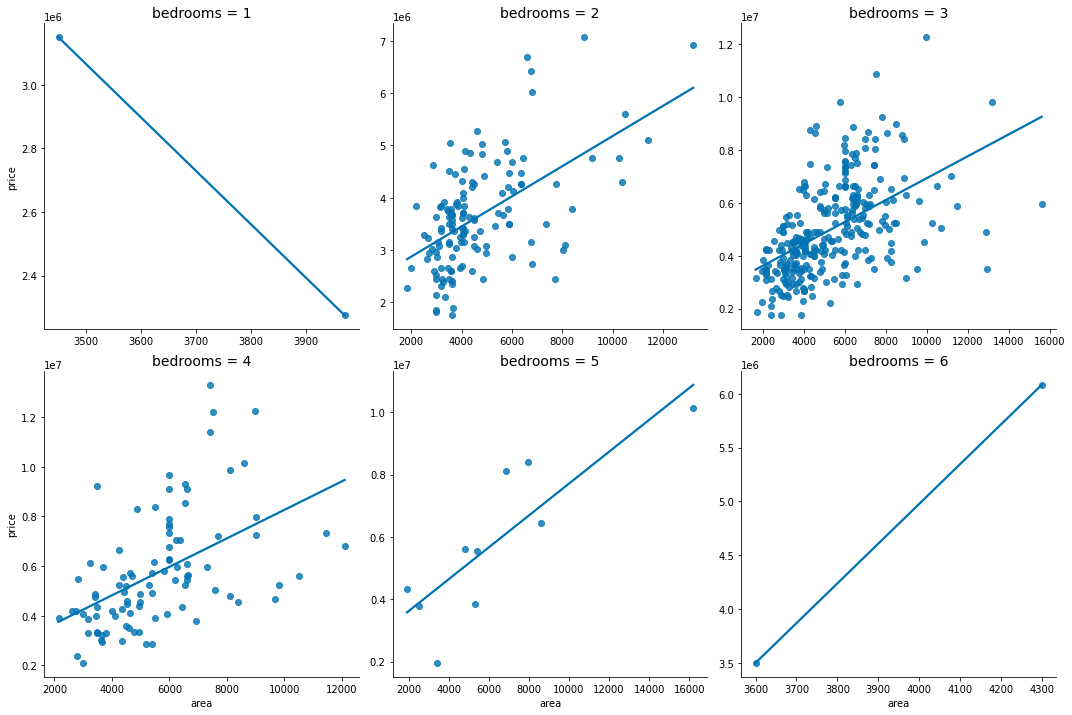

In [20]:
g = sns.lmplot(data=df,x='area', y='price', col='bedrooms',col_wrap=3
           ,facet_kws=dict(sharex=False, sharey=False), ci=None)
g.set_titles(size=14)
plt.show()

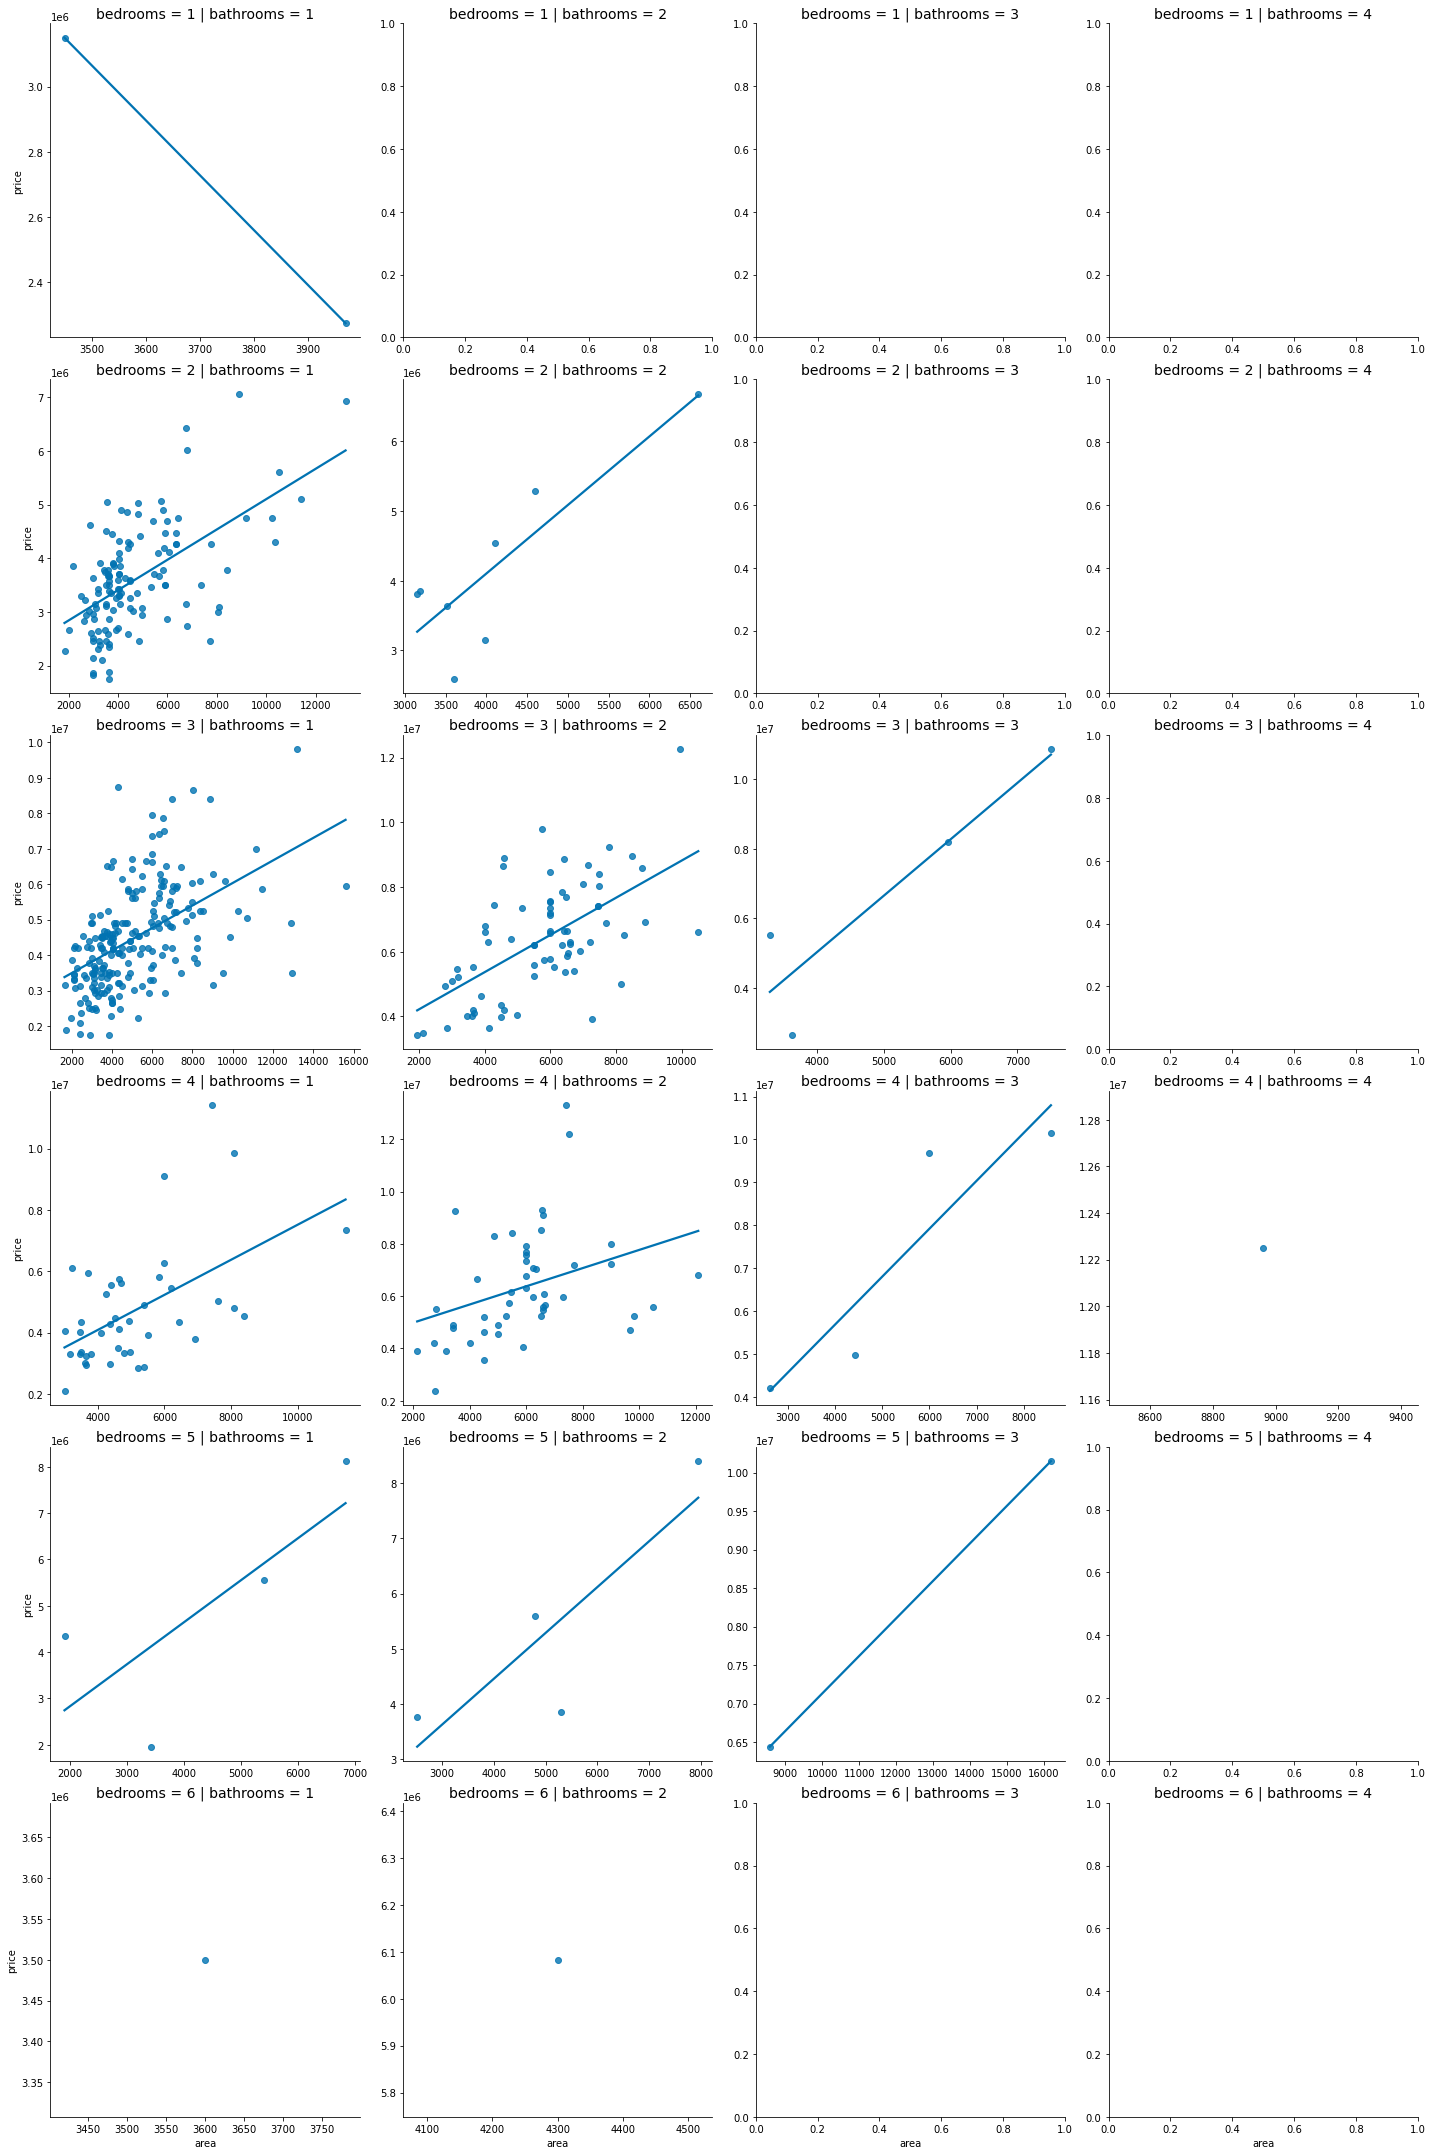

In [21]:
g = sns.lmplot(data=df,x='area', y='price', row='bedrooms',col='bathrooms'
           ,facet_kws=dict(sharex=False, sharey=False), ci=None)
g.set_titles(size=14)
plt.show()